## Project 1 - Regression algorithm

### Query the data 

In [3]:
# Import libraries 
import pandas as pd 
import sklearn
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization

from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric

#Query the data

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

### Attribute Information
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

### Compute missing values Rm

In [4]:
NumMis=df.isna().sum()
CountNum=df.count()
Rm=NumMis/CountNum
print(Rm)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Find Outliers:
Using boxplot, we can identify if the dataset contain Outliers

We decide to plot two boxplot because some values are boolean or near to 1, and other values are bigger than 100. If we plot all the dataframe in ofe boxplot it could be harder to find outliers in a grafical way.

<AxesSubplot:>

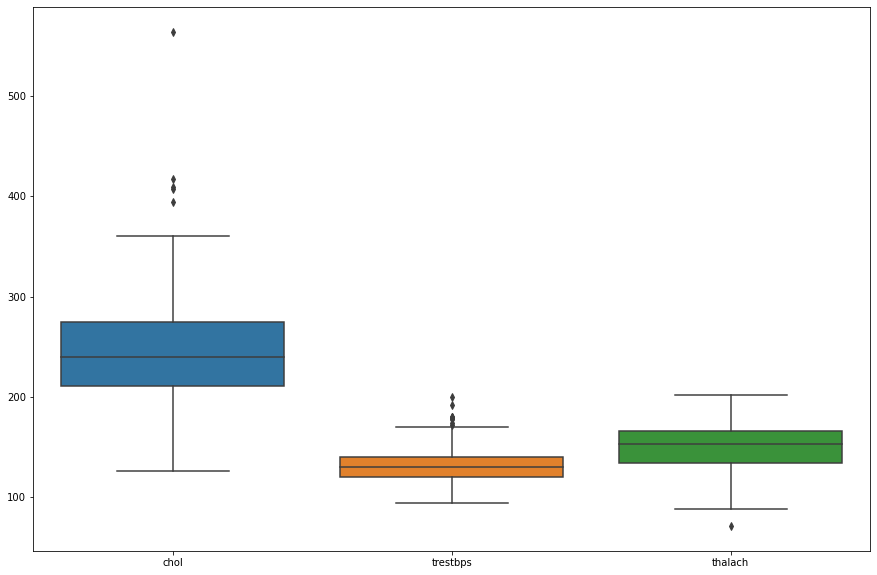

In [6]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['chol','trestbps','thalach']])

<AxesSubplot:>

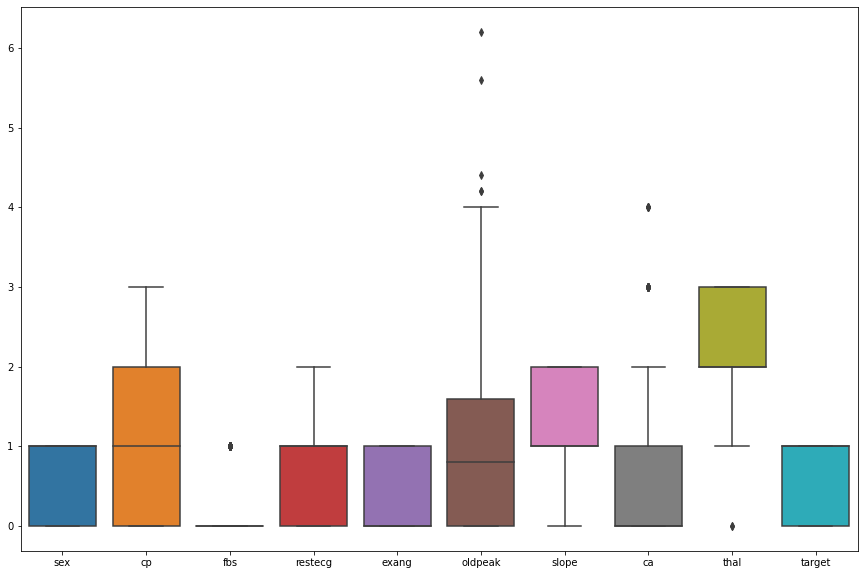

In [7]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']])

## Removing all rows that have at least one Outlier in one column with scipy library


In [8]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


### Data visualization after removing the Outliers

<AxesSubplot:>

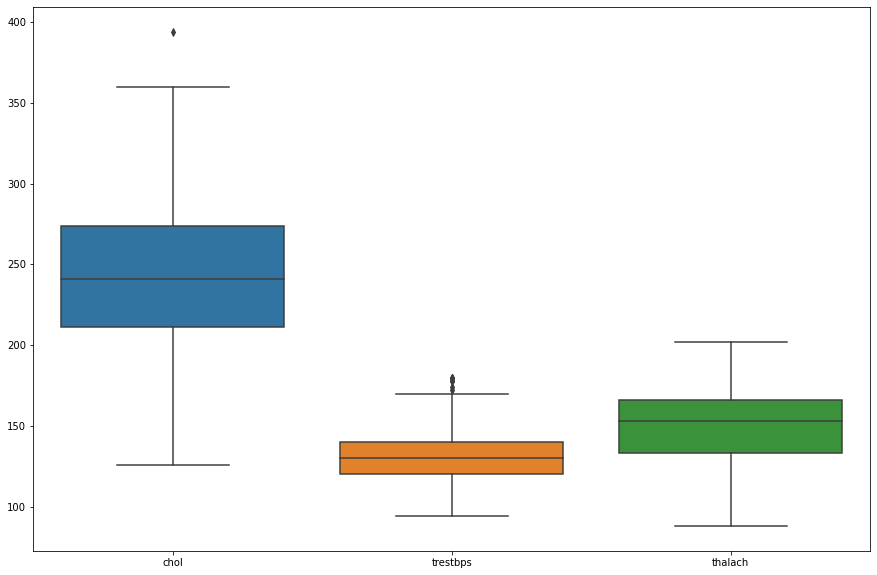

In [10]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['chol','trestbps','thalach']])

<AxesSubplot:>

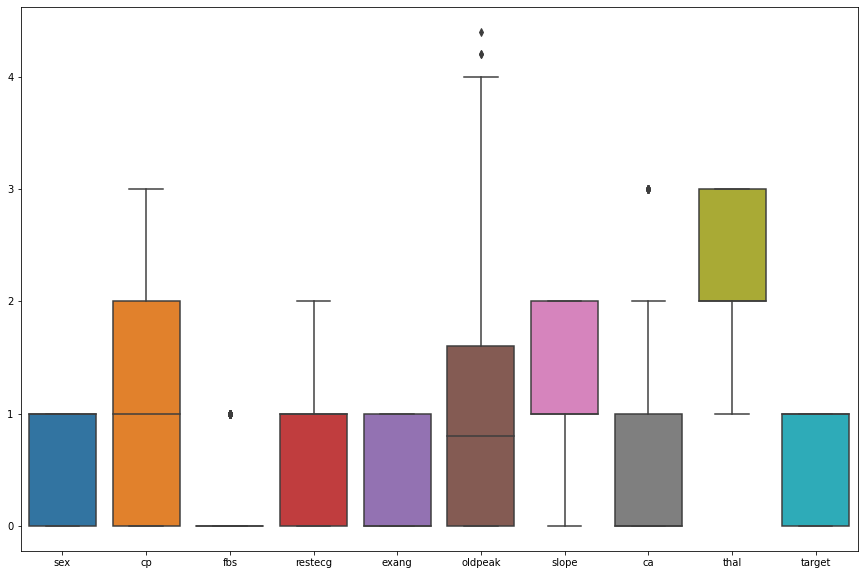

In [11]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']])

### See the relationship across the entire dataset

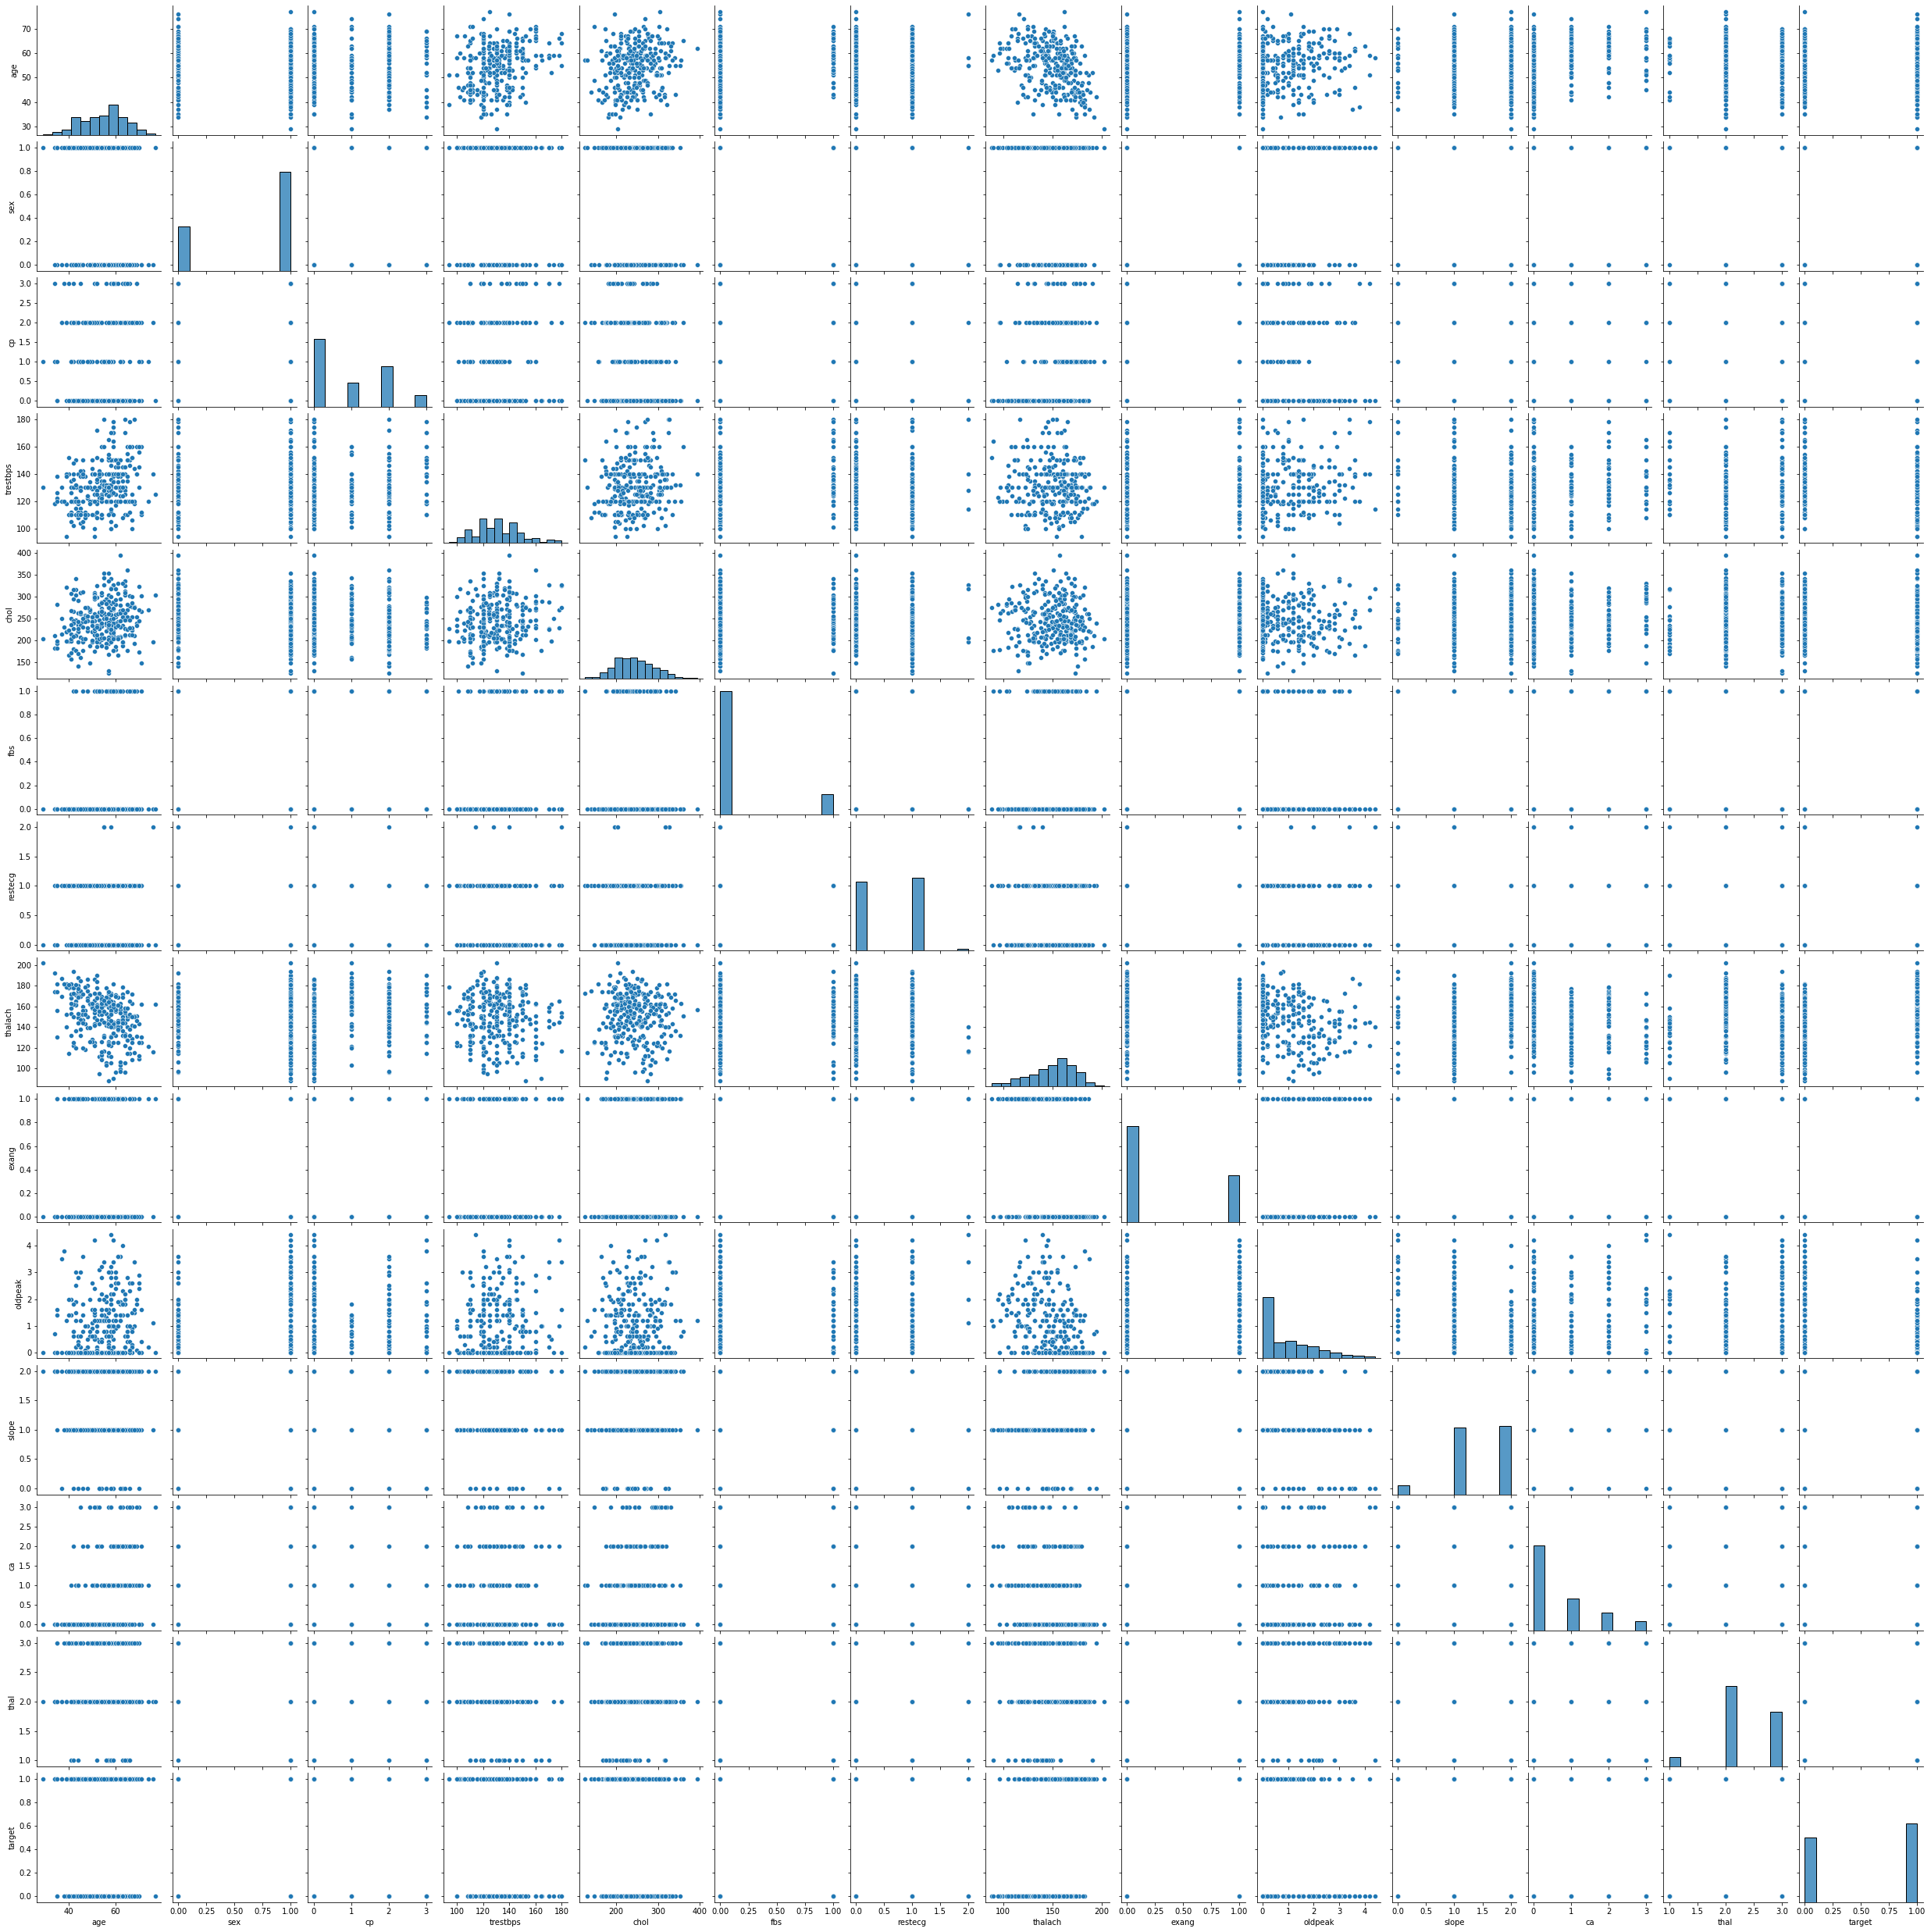

In [12]:
#See the relationship across the entire dataset
sns.pairplot(df)

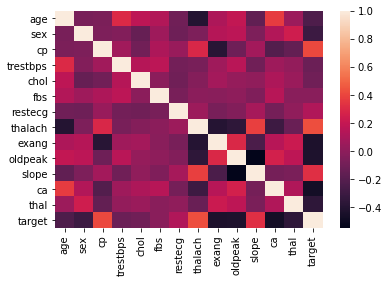

In [13]:
#Create a heatmap with the correlation
sns.heatmap(df.corr());

## Know we can start building our Model


In [14]:
#Split the data
X_var = np.asarray(df[['chol','trestbps','thalach','sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal']])
y_var = np.asarray(df['target'])


In [15]:
#normalice the x variable

X_var = StandardScaler().fit(X_var).transform(X_var)


In [16]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 4)

In [20]:
len(X_train)

200

In [19]:
len(X_test)

87

In [15]:
#Modeling logistic regression
lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(X_train,y_train)


LogisticRegression(C=0.1, solver='liblinear')

In [16]:

# Predictions

yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

print('yhat samples : ', yhat[:10])
print('yhat_prob samples : ',yhat_prob[:10])

yhat samples :  [0 1 1 0 1 1 1 1 1 0]
yhat_prob samples :  [[0.73909823 0.26090177]
 [0.12972315 0.87027685]
 [0.0314662  0.9685338 ]
 [0.67363722 0.32636278]
 [0.37423203 0.62576797]
 [0.19346085 0.80653915]
 [0.21182112 0.78817888]
 [0.11611092 0.88388908]
 [0.20932075 0.79067925]
 [0.90486486 0.09513514]]


In [17]:
#Model evaluation
# 2. Precision Score

print('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)))

Precision Score of our model is 0.86


In [18]:

# 4. Classificaton report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.86      0.89      0.87        54

    accuracy                           0.84        87
   macro avg       0.83      0.82      0.83        87
weighted avg       0.84      0.84      0.84        87



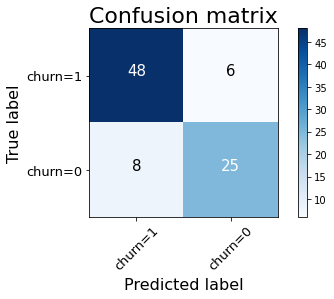

In [19]:
# 5. Confusion matrix

def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn=1','churn=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat, labels=[1,0])

array([[48,  6],
       [ 8, 25]], dtype=int64)